# Análisis de Errores en Dispositivos

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


*    **df_full_devices**:
Este dataset contiene información detallada sobre dispositivos y sus atributos, que podrían estar relacionados con fallos y, por tanto, con la probabilidad de que un dispositivo falle. Esto podría influir indirectamente en las ventas y rentabilidad, ya que productos con dispositivos propensos a fallar podrían vender menos o tener costos de devolución/reparación que afectan la rentabilidad.
        *    failure (Indicador binario de fallo que podría influir en la rentabilidad)
        *    attribute1 a attribute9 (atributos que podrían tener una correlación con la tasa de fallos, y por lo tanto, afectar las ventas y la rentabilidad.)
        *    device (Identificador del dispositivo)

In [2]:
df_full_devices = pd.read_csv('/home/insightlab/Documents/MercadoLibre/arquivos/full_devices.csv', encoding='latin1')
df_full_devices

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
0,2015-01-01,S1F01085,0,215630672,56,0,52,6,407438,0,0,7
1,2015-01-01,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0
2,2015-01-01,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0
3,2015-01-01,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0
4,2015-01-01,S1F01R2B,0,135970480,0,0,0,15,313173,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
124489,2015-11-02,Z1F0MA1S,0,18310224,0,0,0,10,353705,8,8,0
124490,2015-11-02,Z1F0Q8RT,0,172556680,96,107,4,11,332792,0,0,13
124491,2015-11-02,Z1F0QK05,0,19029120,4832,0,0,11,350410,0,0,0
124492,2015-11-02,Z1F0QL3N,0,226953408,0,0,0,12,358980,0,0,0


In [4]:
df_full_devices.describe()

,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
count,124494.000000,1.244940e+05,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000
mean,0.000851,1.223881e+08,159.484762,9.940455,1.741120,14.222669,260172.657726,0.292528,0.292528,12.451524
std,0.029167,7.045933e+07,2179.657730,185.747321,22.908507,15.943028,99151.078547,7.436924,7.436924,191.425623
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000,8.000000,0.000000,0.000000,0.000000
25%,0.000000,6.128476e+07,0.000000,0.000000,0.000000,8.000000,221452.000000,0.000000,0.000000,0.000000
50%,0.000000,1.227974e+08,0.000000,0.000000,0.000000,10.000000,249799.500000,0.000000,0.000000,0.000000
75%,0.000000,1.833096e+08,0.000000,0.000000,0.000000,12.000000,310266.000000,0.000000,0.000000,0.000000
max,1.000000,2.441405e+08,64968.000000,24929.000000,1666.000000,98.000000,689161.000000,832.000000,832.000000,18701.000000


Este analisis estadistico nos permite comprender como se reportan los fallos en dispositivos, donde la columna *failure* tiene una media muy baja (0.000851) y una desviación estándar baja, lo que indica que los fallos son extremadamente raros.

Asi mismo, la columna *attribute1* tiene una media y desviasión elevados, dando espacio a una gran variabilidad, lo que podría ser interesante de explorar más a fondo para ver si estas variaciones tienen algún impacto en otros aspectos, como la tasa de fallos.

In [3]:
df_full_devices.dtypes

date          object
device        object
failure        int64
attribute1     int64
attribute2     int64
attribute3     int64
attribute4     int64
attribute5     int64
attribute6     int64
attribute7     int64
attribute8     int64
attribute9     int64
dtype: object

In [4]:
df_full_devices['failure'].unique()

array([0, 1])

In [15]:
df_full_devices['date'] = pd.to_datetime(df_full_devices['date'])
# Obtener la fecha mínima y máxima
fecha_minima = df_full_devices['date'].min()
fecha_maxima = df_full_devices['date'].max()
print(f'Fecha mínima registrada: {fecha_minima}')
print(f'Fecha máxima registrada: {fecha_maxima}')

Fecha mínima registrada: 2015-01-01 00:00:00
Fecha máxima registrada: 2015-11-02 00:00:00


In [17]:
# Distribución de los errores (failure)
failure_distribution = df_full_devices['failure'].value_counts(normalize=True)
print("Distribución de errores:")
failure_distribution

Distribución de errores:


failure
0    0.999149
1    0.000851
Name: proportion, dtype: float64

In [18]:
# Distribución de los atributos
attributes_distribution = df_full_devices[[f'attribute{i}' for i in range(1, 10)]].describe()
print("Distribución de los atributos:")
attributes_distribution

Distribución de los atributos:


,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
count,1.244940e+05,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000
mean,1.223881e+08,159.484762,9.940455,1.741120,14.222669,260172.657726,0.292528,0.292528,12.451524
std,7.045933e+07,2179.657730,185.747321,22.908507,15.943028,99151.078547,7.436924,7.436924,191.425623
min,0.000000e+00,0.000000,0.000000,0.000000,1.000000,8.000000,0.000000,0.000000,0.000000
25%,6.128476e+07,0.000000,0.000000,0.000000,8.000000,221452.000000,0.000000,0.000000,0.000000
50%,1.227974e+08,0.000000,0.000000,0.000000,10.000000,249799.500000,0.000000,0.000000,0.000000
75%,1.833096e+08,0.000000,0.000000,0.000000,12.000000,310266.000000,0.000000,0.000000,0.000000
max,2.441405e+08,64968.000000,24929.000000,1666.000000,98.000000,689161.000000,832.000000,832.000000,18701.000000


In [20]:
# Extraer año, mes y día de la fecha, ya que nuestro date tiene formato fecha
df_full_devices['year'] = df_full_devices['date'].dt.year
df_full_devices['month'] = df_full_devices['date'].dt.month
df_full_devices['day'] = df_full_devices['date'].dt.day

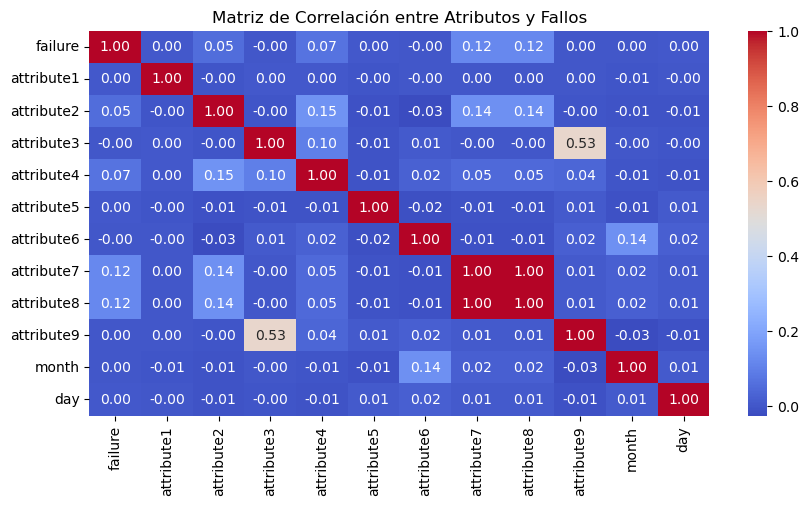

In [39]:
# Seleccionar solo las columnas numéricas para la correlación
numeric_columns = ['failure', 'attribute1', 'attribute2', 'attribute3', 'attribute4', 
                   'attribute5', 'attribute6', 'attribute7', 'attribute8', 'attribute9',
                   #'year', 
                   'month', 'day'
                   ]

# Calcular la matriz de correlación
correlation_matrix = df_full_devices[numeric_columns].corr()

plt.figure(figsize=(10, 5))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Matriz de Correlación entre Atributos y Fallos')
plt.show()

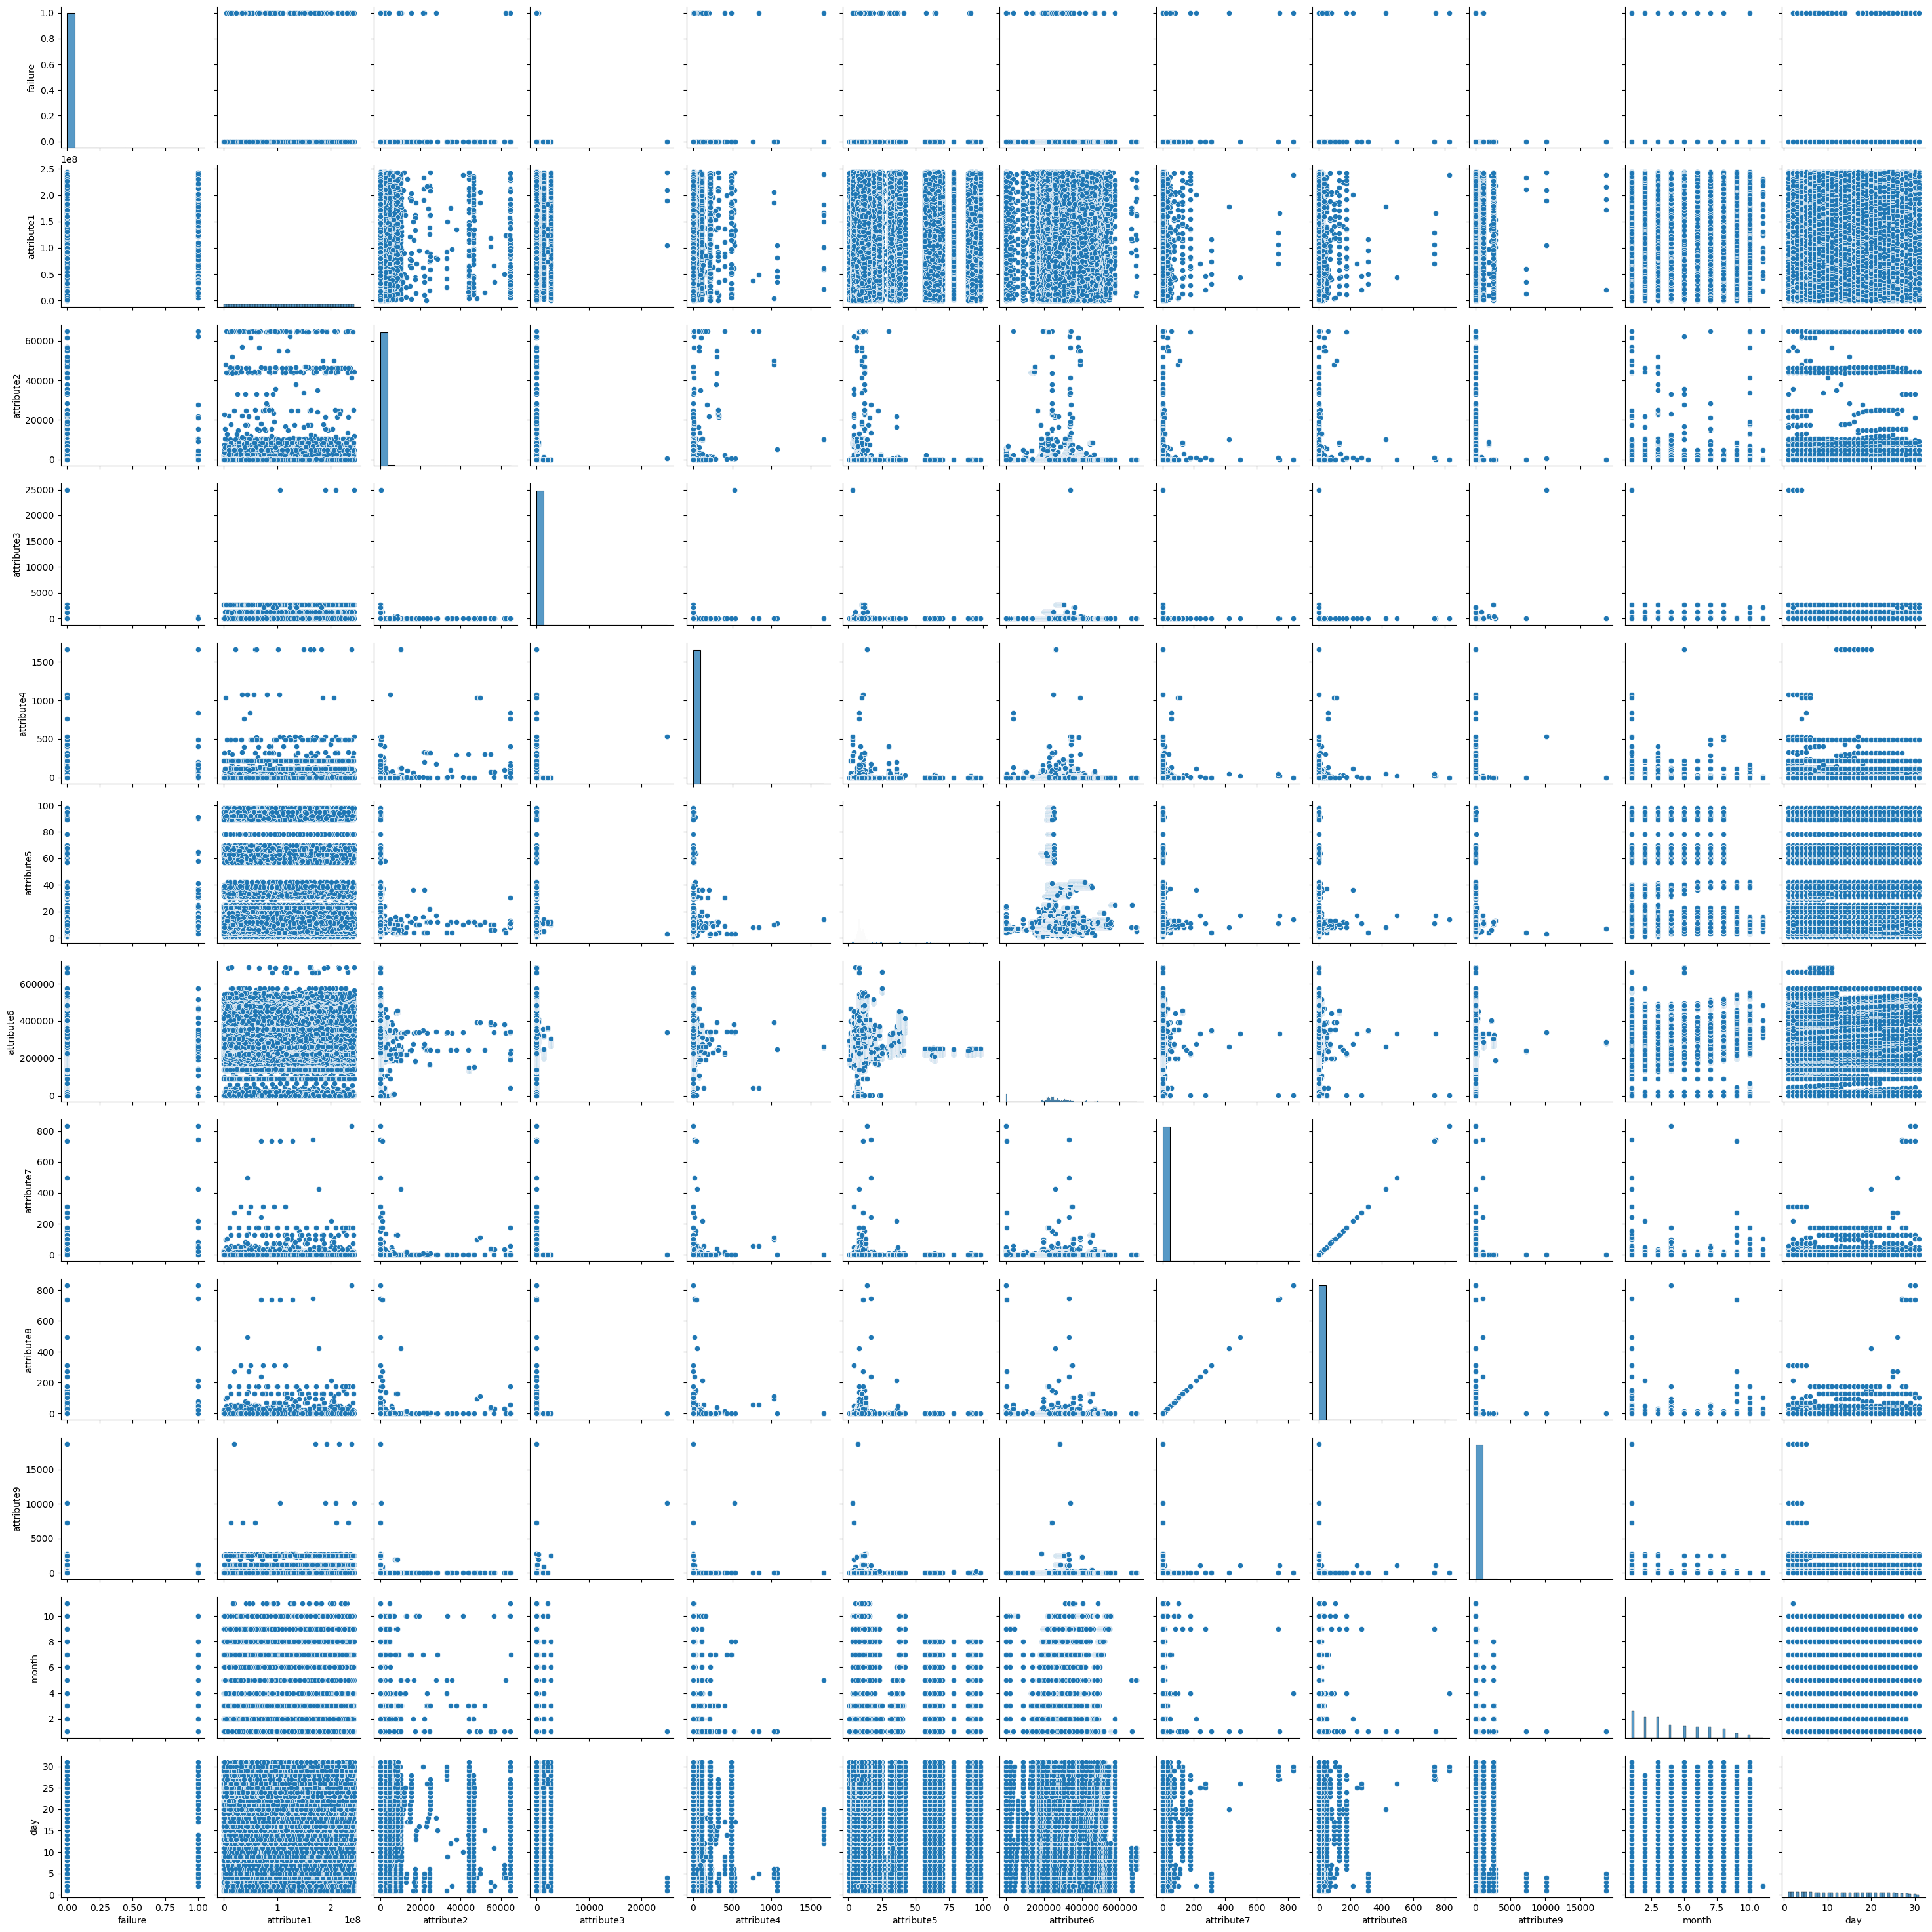

In [28]:
sns.pairplot(df_full_devices[numeric_columns])

In [29]:
# Analizar la correlación específica con 'failure'
print(correlation_matrix['failure'].sort_values(ascending=False))

failure       1.000000
attribute7    0.119055
attribute8    0.119055
attribute4    0.067398
attribute2    0.052902
day           0.002994
attribute5    0.002270
attribute1    0.001983
attribute9    0.001622
month         0.000321
attribute6   -0.000550
attribute3   -0.000948
Name: failure, dtype: float64


Los attribute7 y attribute8 tienen la mayor correlación positiva con failure 0.119. Los attribute4 y attribute2 también muestran cierta correlación, aunque es más baja.

Algo para resaltar que la mayoría de los atributos tienen una correlación baja con failure, lo que sugiere que los fallos no están fuertemente influenciados por estos atributos.

Desde la perspectiva temporal, tanto el month como el day muestran correlaciones muy bajas con failure, lo que indica que los fallos no están fuertemente influenciados por el tiempo.

### Análisis de Tendencias Temporales en Fallos:
Dado que todos los datos están en un solo año pero en diferentes meses y días, podemos explorar si hay alguna tendencia temporal en los fallos.

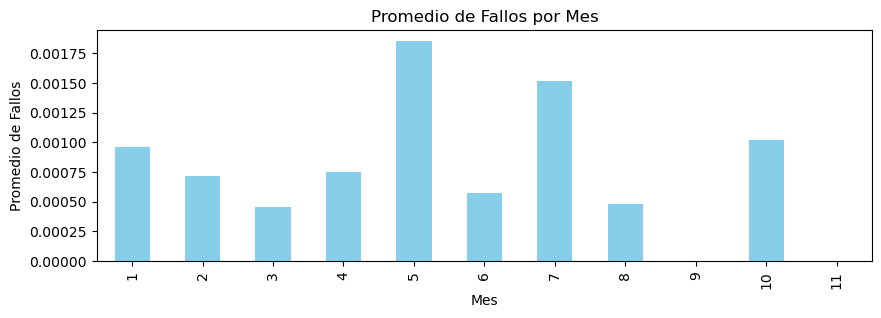

In [32]:
# Agrupar los fallos por mes y día para ver si hay alguna tendencia
monthly_failures = df_full_devices.groupby('month')['failure'].mean()
daily_failures = df_full_devices.groupby('day')['failure'].mean()

plt.figure(figsize=(10, 3))
monthly_failures.plot(kind='bar', color='skyblue')
plt.title('Promedio de Fallos por Mes')
plt.xlabel('Mes')
plt.ylabel('Promedio de Fallos')
plt.show()

Mayo muestra el mayor impacto negativo, lo que podría estar relacionado con un mayor número de fallos o un efecto de estacionalidad.
Sin embargo Septiembre parece tener el mayor impacto positivo en las ventas según la simulación, lo que podría ser un buen punto para enfocar estrategias de venta.

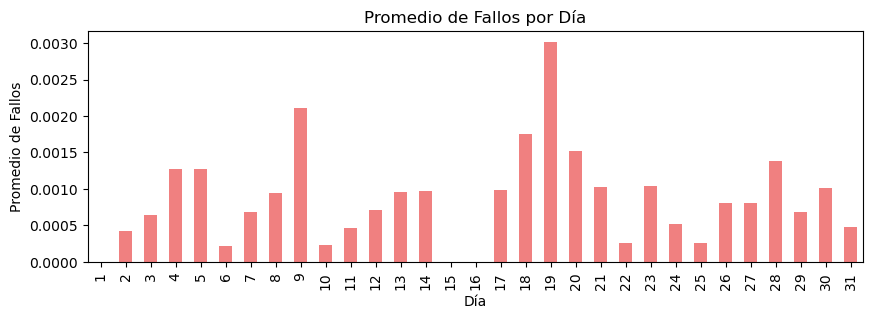

In [35]:
# Visualización de fallos por día
plt.figure(figsize=(10, 3))
daily_failures.plot(kind='bar', color='lightcoral')
plt.title('Promedio de Fallos por Día')
plt.xlabel('Día')
plt.ylabel('Promedio de Fallos')
plt.show()

Hay picos en los días 9, 19, 20 y 29, lo que sugiere que podría haber algo específico en esos días que esté relacionado con un mayor número de fallos.

**Conclusiones:**
*   La baja correlación entre la mayoría de los atributos y failure sugiere que estos atributos pueden no ser los mejores predictores de fallos. Sin embargo, attribute7 y attribute8 pueden ser útiles para detectar patrones de fallos.
*   Aunque las correlaciones temporales son bajas, la distribución de fallos por día muestra algunos picos interesantes que podrían estar relacionados con eventos específicos o errores sistemáticos que ocurren en esos días.

LO que podriamos hacer posteriormente es:

*   Explora más a fondo qué representan attribute7 y attribute8 para entender por qué tienen la mayor correlación con los fallos, sería bueno un sistema de monitoreo para esos atributos en especfico.
*   Implementar otras técnicas más complejas y datos más robustos seria lo ideal para tener mayor precisión en las acciones que se deben realizar para mitigar la ocurrencia de estos fallos.